# Part C: Time series analysis of fares

The dataset has information about flights from around mid-April to mid-November in
2022 which is a period of around 31 weeks. Looking at the daily variation of fares in this
time interval reveals interesting patterns that we shall explore in this part.
<br>
We will fix two routes to examine: a) JFK to ORD (Chicago), b) LAX (Los Angeles) to
Atlanta (ATL). For both of these routes (separately) do the following:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "../Dataset/split_01.csv"
 
df = pd.read_csv(data_path)
print(df.head())

                              legId  searchDate  flightDate startingAirport  \
0  cc7ca757dcd0ff76b2f0b4eb37419886  2022-04-16  2022-04-17             ATL   
1  398e2cd3e08b555a1f8c2113824474ca  2022-04-16  2022-04-17             ATL   
2  12ace2050ae312b0223484a949eaf227  2022-04-16  2022-04-17             ATL   
3  1122006b99c9a15118b2e469815555db  2022-04-16  2022-04-17             ATL   
4  97a100c46442e1d44b9a347e07124f01  2022-04-16  2022-04-17             ATL   

  destinationAirport fareBasisCode travelDuration  elapsedDays  \
0                CLT      QAA0JHES        PT5H52M            0   
1                DTW      L0AIZNN1        PT3H46M            0   
2                DTW      KA0NX0MC        PT8H45M            1   
3                DTW      QA0NA0MC         PT8H9M            1   
4                DTW      MA0QA0MQ        PT5H12M            0   

   isBasicEconomy  isRefundable  ...  segmentsArrivalTimeEpochSeconds  \
0           False         False  ...           16502404

# (i) Extract the flightDate and the totalFare for all flights in the full dataset for the route.
# Find the average fare for each day. Plot the average fare vs date.

Let us first drop all the rows whose data is not available, that is NaN or null

In [2]:
print("Length before dropping rows:", len(df))
df.dropna(inplace=True)
print("Length after dropping rows:", len(df))

Length before dropping rows: 4106023
Length after dropping rows: 3736879


Filtering out flights on the two routes.
<br>
a) JFK to ORD
<br>
b) LAX to ATL

In [3]:
# JFK to ORD
part_a_df = df[(df['startingAirport'] == 'JFK') & (df['destinationAirport'] == 'ORD')]
print(part_a_df.head())

# LAX to ATL
part_b_df = df[(df['startingAirport'] == 'LAX') & (df['destinationAirport'] == 'ATL')]
print(part_b_df.head())

                                legId  searchDate  flightDate startingAirport  \
205  fb684a986d227a4a1f9113ee2eb4fd64  2022-04-16  2022-04-17             JFK   
206  617d7553e9151c25b444f0475829c042  2022-04-16  2022-04-17             JFK   
207  f11c60280dcc6e4b90b90b355d592ce1  2022-04-16  2022-04-17             JFK   
582  33809c4f3f33aeb44be9c8f29cad0721  2022-04-16  2022-04-18             JFK   
583  437056c75a3c3284d75f38d4da386f38  2022-04-16  2022-04-18             JFK   

    destinationAirport fareBasisCode travelDuration  elapsedDays  \
205                ORD      KA0OA0MQ        PT6H35M            0   
206                ORD      QA0NA0MQ       PT10H59M            1   
207                ORD      MA0QA0MQ           PT5H            0   
582                ORD      HH0JUEY5        PT2H56M            0   
583                ORD      HA0NA0MQ        PT5H44M            0   

     isBasicEconomy  isRefundable  ...  segmentsArrivalTimeEpochSeconds  \
205           False         F

In [4]:
# Calculating the daily average fare
part_a_daily_avg_fare = part_a_df.groupby('flightDate')['totalFare'].mean().reset_index()
part_a_daily_avg_fare = part_a_daily_avg_fare.sort_values(by='flightDate')

part_b_daily_avg_fare = part_b_df.groupby('flightDate')['totalFare'].mean().reset_index()
part_b_daily_avg_fare = part_b_daily_avg_fare.sort_values(by='flightDate')

print("a) JFK to ORD Daily Average Fare:")
print(part_a_daily_avg_fare)
print("b) LAX to ATL Daily Average Fare:")
print(part_b_daily_avg_fare)

a) JFK to ORD Daily Average Fare:
     flightDate   totalFare
0    2022-04-17  545.130000
1    2022-04-18  419.100000
2    2022-04-19  465.475000
3    2022-04-20  285.619000
4    2022-04-21  329.722222
..          ...         ...
212  2022-11-15  383.657778
213  2022-11-16  315.331875
214  2022-11-17  504.947222
215  2022-11-18  409.730000
216  2022-11-19  400.554000

[217 rows x 2 columns]
b) LAX to ATL Daily Average Fare:
     flightDate   totalFare
0    2022-04-17  370.600000
1    2022-04-18  490.436667
2    2022-04-19  438.358571
3    2022-04-20  448.422727
4    2022-04-21  514.936667
..          ...         ...
212  2022-11-15  270.646111
213  2022-11-16  314.337857
214  2022-11-17  405.007778
215  2022-11-18  455.473333
216  2022-11-19  439.065000

[217 rows x 2 columns]


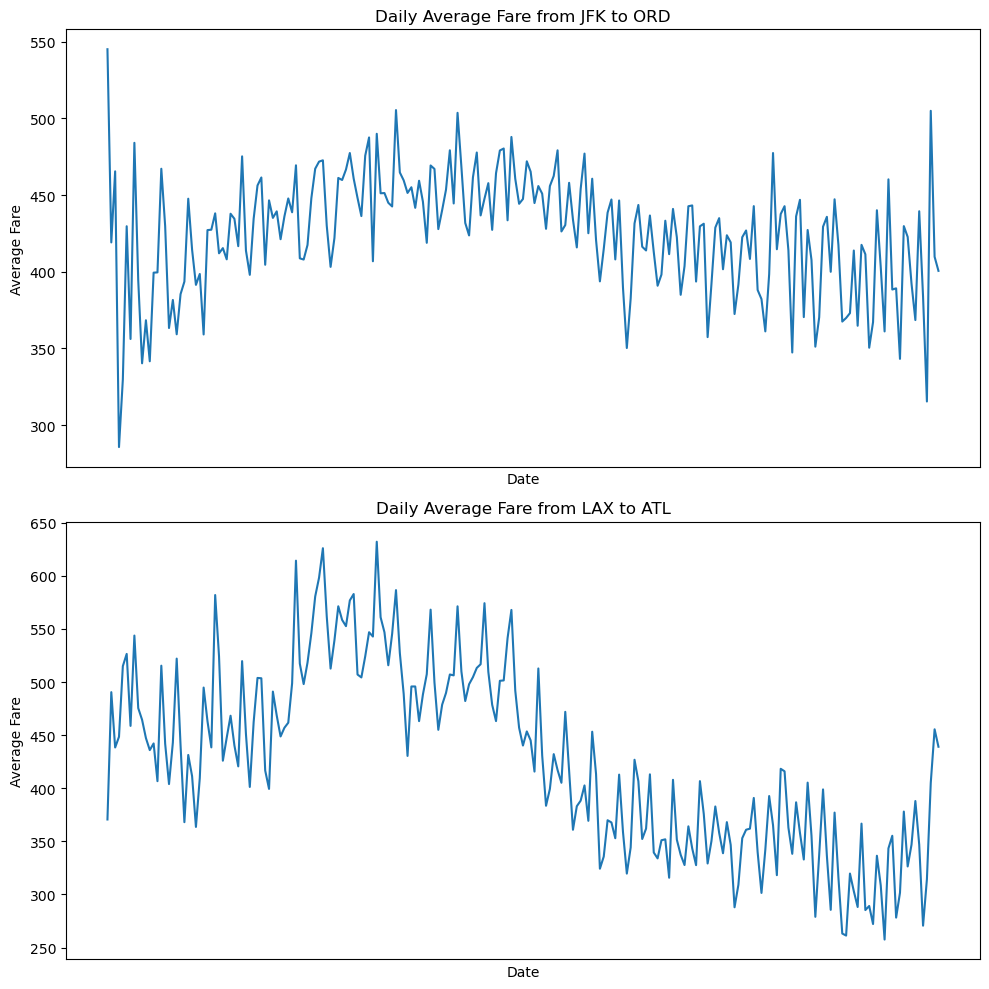

In [5]:
# Plotting the daily average fare
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plotting for JFK to ORD
sns.lineplot(data=part_a_daily_avg_fare, x='flightDate', y='totalFare', ax=axes[0])
axes[0].set_title('Daily Average Fare from JFK to ORD')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Average Fare')
axes[0].set_xticks([])

# Plotting for LAX to ATL
sns.lineplot(data=part_b_daily_avg_fare, x='flightDate', y='totalFare', ax=axes[1])
axes[1].set_title('Daily Average Fare from LAX to ATL')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Average Fare')
axes[1].set_xticks([])
plt.tight_layout()
plt.show()

# (ii) Perform an AR(k) analysis on the average fares with k varying from 3 to 10. Find the MAPE and the SSE metrics for your analyses and plot these as a function of k (k from 3 to 10) in two separate plots. What do you observe? What values of k work well? Why do you think these values of k work well? Note that for making the prediction and for evaluating your prediction, use the following methodology:
Use the first 15 days of the dataset for training, and predict the 16th day’s value. Then,
for predicting the 17th day’s value, use the first 16 days of the dataset. Continue this
way until the end of the dataset. If there are x days in the dataset, use the (x-1) days to
train your model to make the prediction for the x’th day. When computing SSE and
MAPE, compare predicted values with ground truth values as usual.

In [6]:
def AR(df, k): 
    actual, predicted = [], []

    for i in range(15, len(df)): # 15 is first predicted date as 0-indexed (actual predicted date is 16)
        actual.append(df['totalFare'].iloc[i])
        predicted.append(np.mean(df['totalFare'].iloc[i-k:i]))

    actual = np.array(actual)
    predicted = np.array(predicted)

    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    sse = np.sum((actual - predicted) ** 2)

    return mape, sse

a) JFK to ORD: MAPE and SSE
k=3, MAPE=6.39%, SSE=219762.57
k=4, MAPE=6.10%, SSE=205266.02
k=5, MAPE=6.16%, SSE=205868.17
k=6, MAPE=5.94%, SSE=192304.55
k=7, MAPE=5.43%, SSE=163289.20
k=8, MAPE=5.36%, SSE=162078.03
k=9, MAPE=5.47%, SSE=167940.41
k=10, MAPE=5.51%, SSE=171363.33


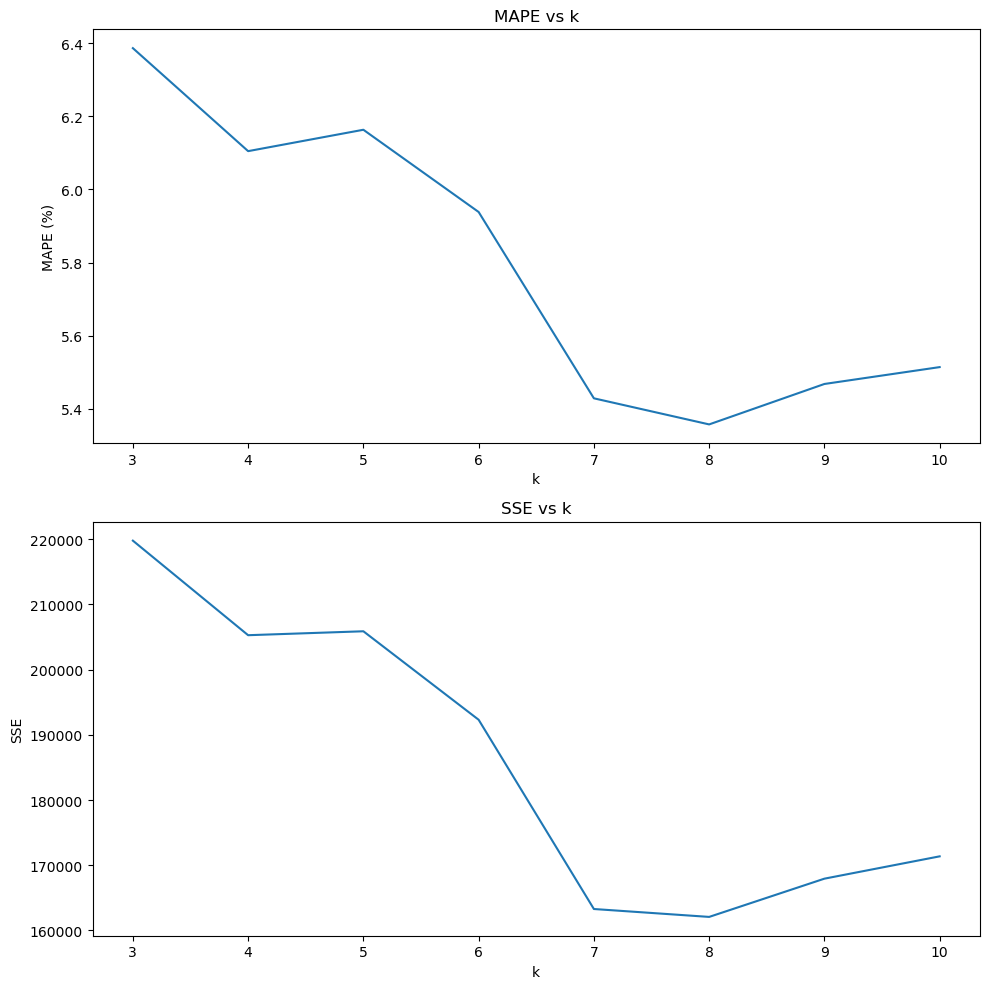

In [7]:
mape_list = []
sse_list = []

print("a) JFK to ORD: MAPE and SSE")
for k in range(3, 11):
    mape, sse = AR(part_a_daily_avg_fare, k)
    mape_list.append(mape)
    sse_list.append(sse)
    print(f"k={k}, MAPE={mape:.2f}%, SSE={sse:.2f}")

# Plotting MAPE and SSE
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

sns.lineplot(x=range(3, 11), y=mape_list, ax=axes[0])
axes[0].set_title('MAPE vs k')
axes[0].set_xlabel('k')
axes[0].set_ylabel('MAPE (%)')

sns.lineplot(x=range(3, 11), y=sse_list, ax=axes[1])
axes[1].set_title('SSE vs k')
axes[1].set_xlabel('k')
axes[1].set_ylabel('SSE')
plt.tight_layout()
plt.show()

b) LAX to ATL: MAPE and SSE
k=3, MAPE=9.18%, SSE=440081.60
k=4, MAPE=8.51%, SSE=396624.50
k=5, MAPE=8.67%, SSE=417550.09
k=6, MAPE=8.65%, SSE=411700.50
k=7, MAPE=8.20%, SSE=374305.64
k=8, MAPE=8.31%, SSE=385974.56
k=9, MAPE=8.64%, SSE=411385.57
k=10, MAPE=8.73%, SSE=411824.53


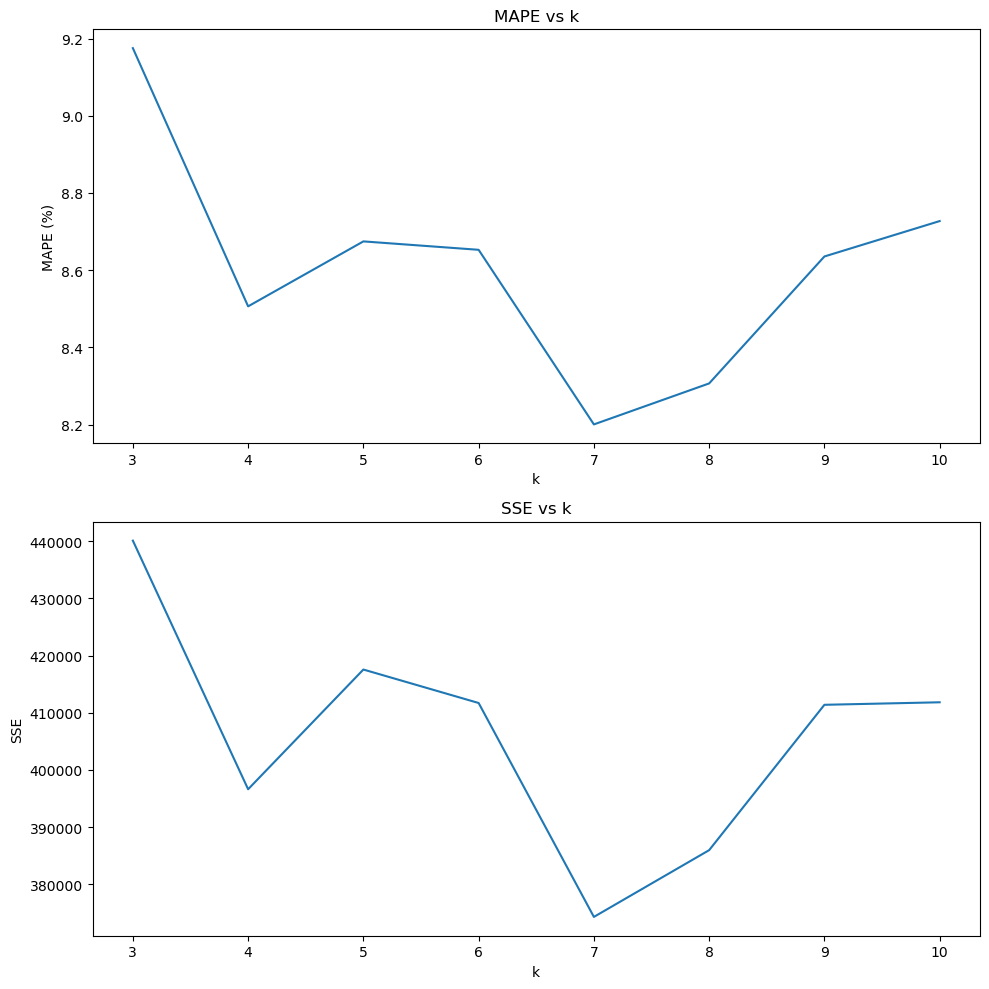

In [8]:
mape_list = []
sse_list = []

print("b) LAX to ATL: MAPE and SSE")
for k in range(3, 11):
    mape, sse = AR(part_b_daily_avg_fare, k)
    mape_list.append(mape)
    sse_list.append(sse)
    print(f"k={k}, MAPE={mape:.2f}%, SSE={sse:.2f}")

# Plotting MAPE and SSE
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

sns.lineplot(x=range(3, 11), y=mape_list, ax=axes[0])
axes[0].set_title('MAPE vs k')
axes[0].set_xlabel('k')
axes[0].set_ylabel('MAPE (%)')

sns.lineplot(x=range(3, 11), y=sse_list, ax=axes[1])
axes[1].set_title('SSE vs k')
axes[1].set_xlabel('k')
axes[1].set_ylabel('SSE')
plt.tight_layout()
plt.show()

In part a) for **k=8**, the MAPE and SSE values are the lowest, indicating that this is the best k value for the AR model.
<br>
In part b) for **k=7**, the MAPE and SSE values are the lowest, indicating that this is the best k value for the AR model.
<br>
We believe that the flightFares follow a **weekly pattern**, so the MAPE and SSE values are lower for k=7.

# (iii) Perform EWMA on the same data for ɑ=0.5 and ɑ=0.8. Choose y1^ = y1 as your initial predictor. Again find the MAPE and the SSE metrics. Comment on the performance of the best AR method (the one with the best p among those tried) vs the performance of the best EWMA method (the one with the best ɑ among those tried).
Use the same methodology for training/testing as in (iii) above.

In [9]:
def EWMA(df, alpha):
    actual, predicted = [], []

    y_hat = df['totalFare'].iloc[0] # initial value y1_hat

    for i in range(15, len(df)): # 15 is first predicted date as 0-indexed (actual predicted date is 16)
        actual.append(df['totalFare'].iloc[i])
        y_hat = alpha * df['totalFare'].iloc[i] + (1 - alpha) * y_hat
        predicted.append(y_hat)

    actual = np.array(actual)
    predicted = np.array(predicted)

    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    sse = np.sum((actual - predicted) ** 2)

    return mape, sse

In [10]:
alphas = [0.5, 0.8]

In [11]:
mape_list = []
sse_list = []

print("a) JFK to ORD: MAPE and SSE")
for alpha in alphas:
    mape, sse = EWMA(part_a_daily_avg_fare, alpha)
    mape_list.append(mape)
    sse_list.append(sse)
    print(f"alpha={alpha:.1f}, MAPE={mape:.2f}%, SSE={sse:.2f}")

a) JFK to ORD: MAPE and SSE
alpha=0.5, MAPE=3.24%, SSE=61010.27
alpha=0.8, MAPE=1.38%, SSE=11233.00


In [12]:
mape_list = []
sse_list = []

print("b) LAX to ATL: MAPE and SSE")
for alpha in alphas:
    mape, sse = EWMA(part_b_daily_avg_fare, alpha)
    mape_list.append(mape)
    sse_list.append(sse)
    print(f"alpha={alpha:.1f}, MAPE={mape:.2f}%, SSE={sse:.2f}")

b) LAX to ATL: MAPE and SSE
alpha=0.5, MAPE=4.39%, SSE=102181.87
alpha=0.8, MAPE=1.90%, SSE=18138.03


In both parts a) and b) **alpha=0.8** gives lower MAPE and SSE.
<br>
In comparison to the AR model, the **EWMA model** has **lower MAPE and SSE values** for both routes than the AR model.

# (iv) Repeat the above analyses for weekly rather than daily averages. The dataset has information for 31 weeks starting from a Sunday (17 Apr 2022). Find the average fare for each week (Sunday to the next Saturday) and perform the AR (use k=2,3,4) and the EWMA analyses (use ɑ=0.5, 0.8). Comment on the results obtained. 
For training/testing, start by training on the first 5 weeks and predicting for the 6th week. Then train on the first 6 weeks to predict the 7th week, and so on.

In [13]:
# Part a)
part_a_df['flightDate'] = pd.to_datetime(part_a_df['flightDate'])

# Calculate the week start date (sunday of the week)
part_a_df['weekStartDate'] = pd.to_datetime(part_a_df['flightDate']) - pd.to_timedelta(part_a_df['flightDate'].dt.weekday, unit='d')
part_a_df['weekStartDate'] = part_a_df['weekStartDate'] + pd.DateOffset(days=6)

part_a_weekly_avg_fare = part_a_df.groupby('weekStartDate')['totalFare'].mean().reset_index()
part_a_weekly_avg_fare = part_a_weekly_avg_fare.sort_values(by='weekStartDate')

# Part b)
part_b_df['flightDate'] = pd.to_datetime(part_b_df['flightDate'])

# Calculate the week start date (sunday of the week)
part_b_df['weekStartDate'] = pd.to_datetime(part_b_df['flightDate']) - pd.to_timedelta(part_b_df['flightDate'].dt.weekday, unit='d')
part_b_df['weekStartDate'] = part_b_df['weekStartDate'] + pd.DateOffset(days=6)

part_b_weekly_avg_fare = part_b_df.groupby('weekStartDate')['totalFare'].mean().reset_index()
part_b_weekly_avg_fare = part_b_weekly_avg_fare.sort_values(by='weekStartDate')

/var/folders/x0/z57d4n8d7x72sq50341k2p900000gn/T/ipykernel_54180/2001054792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_a_df['flightDate'] = pd.to_datetime(part_a_df['flightDate'])
/var/folders/x0/z57d4n8d7x72sq50341k2p900000gn/T/ipykernel_54180/2001054792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_a_df['weekStartDate'] = pd.to_datetime(part_a_df['flightDate']) - pd.to_timedelta(part_a_df['flightDate'].dt.weekday, unit='d')
/var/folders/x0/z57d4n8d7x72sq50341k2p900000gn/T/ipykerne

## AR(k)
<br>
Impleenting new AR_weekly(k) function to calculate MAPE and SSE for weekly data

In [14]:
def AR_weekly(df, k):
    actual, predicted = [], []

    for i in range(5, len(df)): # 5 is first predicted week as 0-indexed (actual predicted week is 6)
        actual.append(df['totalFare'].iloc[i])
        predicted.append(np.mean(df['totalFare'].iloc[i-k:i]))

    actual = np.array(actual)
    predicted = np.array(predicted)

    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    sse = np.sum((actual - predicted) ** 2)

    return mape, sse

a) JFK to ORD: MAPE and SSE
k=2, MAPE=2.16%, SSE=3950.58
k=3, MAPE=2.48%, SSE=5331.14
k=4, MAPE=2.97%, SSE=7133.88


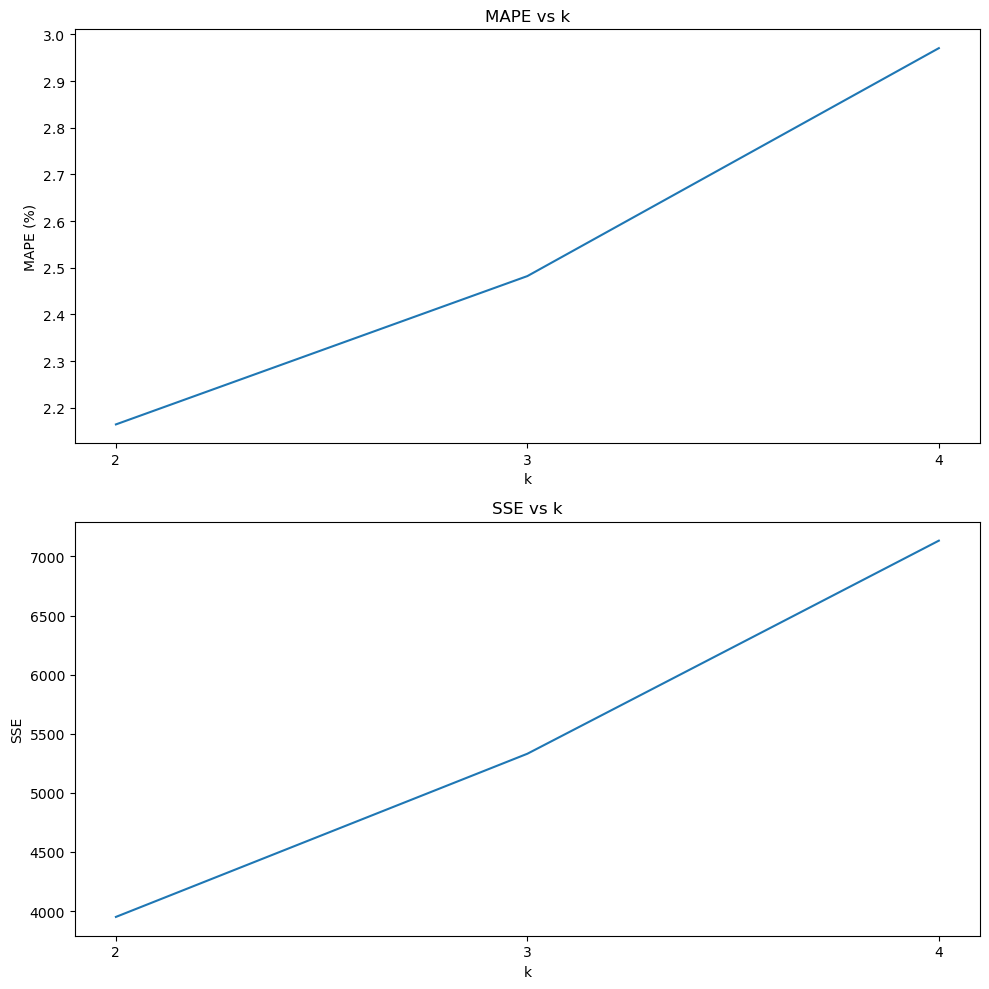

In [15]:
mape_list = []
sse_list = []

print("a) JFK to ORD: MAPE and SSE")
for k in range(2, 5):
    mape, sse = AR_weekly(part_a_weekly_avg_fare, k)
    mape_list.append(mape)
    sse_list.append(sse)
    print(f"k={k}, MAPE={mape:.2f}%, SSE={sse:.2f}")

# Plotting MAPE and SSE
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

sns.lineplot(x=range(2, 5), y=mape_list, ax=axes[0])
axes[0].set_title('MAPE vs k')
axes[0].set_xticks(range(2, 5))
axes[0].set_xlabel('k')
axes[0].set_ylabel('MAPE (%)')

sns.lineplot(x=range(2, 5), y=sse_list, ax=axes[1])
axes[1].set_title('SSE vs k')
axes[1].set_xticks(range(2, 5))
axes[1].set_xlabel('k')
axes[1].set_ylabel('SSE')
plt.tight_layout()
plt.show()

b) LAX to ATL: MAPE and SSE
k=2, MAPE=6.66%, SSE=31433.20
k=3, MAPE=7.60%, SSE=41144.81
k=4, MAPE=8.27%, SSE=50196.01


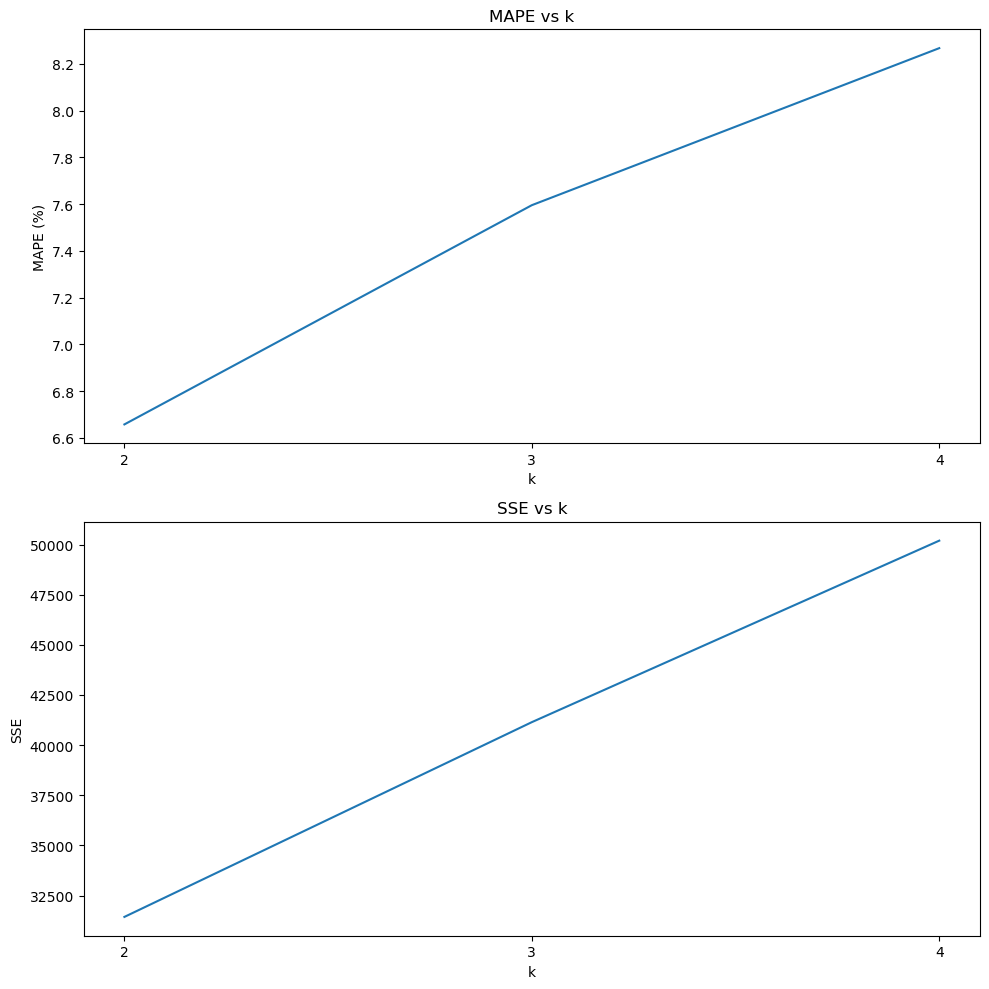

In [16]:
mape_list = []
sse_list = []

print("b) LAX to ATL: MAPE and SSE")
for k in range(2, 5):
    mape, sse = AR_weekly(part_b_weekly_avg_fare, k)
    mape_list.append(mape)
    sse_list.append(sse)
    print(f"k={k}, MAPE={mape:.2f}%, SSE={sse:.2f}")

# Plotting MAPE and SSE
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

sns.lineplot(x=range(2, 5), y=mape_list, ax=axes[0])
axes[0].set_title('MAPE vs k')
axes[0].set_xticks(range(2, 5))
axes[0].set_xlabel('k')
axes[0].set_ylabel('MAPE (%)')

sns.lineplot(x=range(2, 5), y=sse_list, ax=axes[1])
axes[1].set_title('SSE vs k')
axes[1].set_xticks(range(2, 5))
axes[1].set_xlabel('k')
axes[1].set_ylabel('SSE')
plt.tight_layout()
plt.show()

## EWMA
<br>
Implementing new EWMA_weekly(alpha) function to calculate MAPE and SSE for weekly data

In [17]:
def EWMA_weekly(df, alpha):
    actual, predicted = [], []

    y_hat = df['totalFare'].iloc[0] # initial value y1_hat
    
    for i in range(5, len(df)): # 5 is first predicted week as 0-indexed (actual predicted week is 6)
        actual.append(df['totalFare'].iloc[i])
        y_hat = alpha * df['totalFare'].iloc[i] + (1 - alpha) * y_hat
        predicted.append(y_hat)

    actual = np.array(actual)
    predicted = np.array(predicted)

    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    sse = np.sum((actual - predicted) ** 2)

    return mape, sse

In [18]:
alphas = [0.5, 0.8]

In [19]:
mape_list = []
sse_list = []

print("a) JFK to ORD: MAPE and SSE")
for alpha in alphas:
    mape, sse = EWMA_weekly(part_a_weekly_avg_fare, alpha)
    mape_list.append(mape)
    sse_list.append(sse)
    print(f"alpha={alpha:.1f}, MAPE={mape:.2f}%, SSE={sse:.2f}")

a) JFK to ORD: MAPE and SSE
alpha=0.5, MAPE=1.75%, SSE=5296.72
alpha=0.8, MAPE=0.61%, SSE=708.40


In [20]:
mape_list = []
sse_list = []

print("b) LAX to ATL: MAPE and SSE")
for alpha in alphas:
    mape, sse = EWMA_weekly(part_b_weekly_avg_fare, alpha)
    mape_list.append(mape)
    sse_list.append(sse)
    print(f"alpha={alpha:.1f}, MAPE={mape:.2f}%, SSE={sse:.2f}")

b) LAX to ATL: MAPE and SSE
alpha=0.5, MAPE=4.05%, SSE=11919.49
alpha=0.8, MAPE=1.24%, SSE=1273.41


Comments on (iv): 
<br>
AR_weekly(k):
<br>
The MAPE and SSE values increase as k increases. This suggests there is **no** bi-weekly/tri-weekly pattern in the data.
<br>
EWMA_weekly(alpha):
<br>
The MAPE and SSE values also increase as alpha increases. This suggests that there is **no** bi-weekly/tri-weekly pattern in the data.

# (v) What differences do you notice between the two routes in the performances of the methods. Plot the daily average fare data for both routes in one plot and explain if the performance differences between the two routes make sense according to the trends you observe.

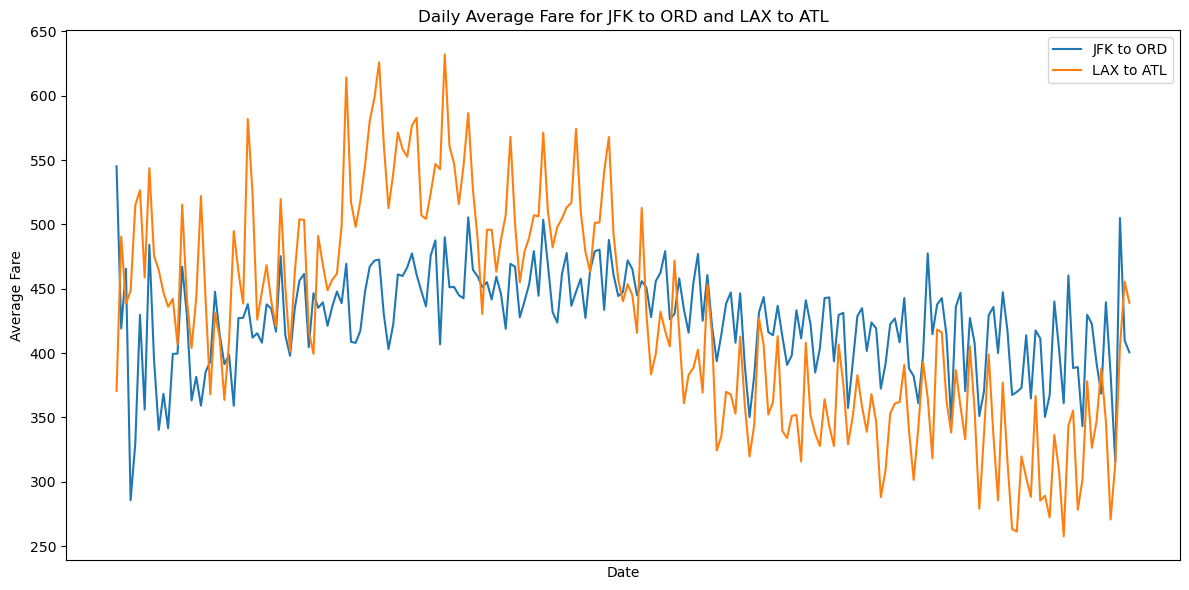

In [21]:
# Plotting the daily average fare for both routes
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=part_a_daily_avg_fare, x='flightDate', y='totalFare', label='JFK to ORD', ax=ax)
sns.lineplot(data=part_b_daily_avg_fare, x='flightDate', y='totalFare', label='LAX to ATL', ax=ax)
ax.set_title('Daily Average Fare for JFK to ORD and LAX to ATL')
ax.set_xlabel('Date')
ax.set_ylabel('Average Fare')
ax.legend()
ax.set_xticks([])
plt.tight_layout()
plt.show()

The prices for the route b) LAX to ATL are more volatile than the prices for the route a) JFK to ORD.
<br>
This can be validated by the MAPE and SSE values for the daily average fare forecasting methods (AR and EWMA) are higher for b) LAX to ATL, indicating that the model is less accurate for this route compared to a) JFK to ORD.